#  Appliances Energy Consumption Prediction

- Data loading and preprocessing
- Exploratory data analysis (EDA)
- Feature engineering
- Model training with Linear Regression, Decision Tree, and Gradient Boosting
- Model evaluation
- Feature importance analysis

In [ ]:
#First import required packages for this project

#Data manipulation 
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


#set seaborn style for better aesthetics in plots
sns.set(style='whitegrid')

##  Step 1: Load & Preprocess Data

In [6]:
#Load the dataset
df=pd.read_csv(r"C:\Users\Asus\Desktop\PYTHON\.venv\Appliances_Energy_Consumpton_Prediction\energydata_complete.csv")
 #Drop all columns that have "Unnamed" in their name (mostly NaN)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#convert date column to datetime and set it as index
df['recorded_timestamp']=pd.to_datetime(df['recorded_timestamp'],dayfirst=True)

df.set_index('recorded_timestamp',inplace=True)


df.drop(columns=['random_variable_1','random_variable_2'],inplace=True,errors='ignore')
#print(df.columns.tolist())

#Create new time-based features
df['hour']=df.index.hour #Hour of the day
df['day_of_week']=df.index.dayofweek # Day of the week
df['month']=df.index.month # Month

#check for missing values
#print('Missing values in each column:')
#print(df.isnull().sum())

In [ ]:
# -------------------- Outlier Detection using IQR --------------------

# Select only numeric columns (float and integer types) from the DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the 1st quartile (25th percentile) for each numeric column
Q1 = df[numeric_cols].quantile(0.25)

# Calculate the 3rd quartile (75th percentile) for each numeric column
Q3 = df[numeric_cols].quantile(0.75)

# Compute the Interquartile Range (IQR) for each numeric column
# IQR = Q3 - Q1 represents the middle 50% of the data
IQR = Q3 - Q1

# Identify and remove rows that contain outliers in any of the numeric columns
# Outliers are defined as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
# For each row: if any column has an outlier, that entire row is removed
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
          (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


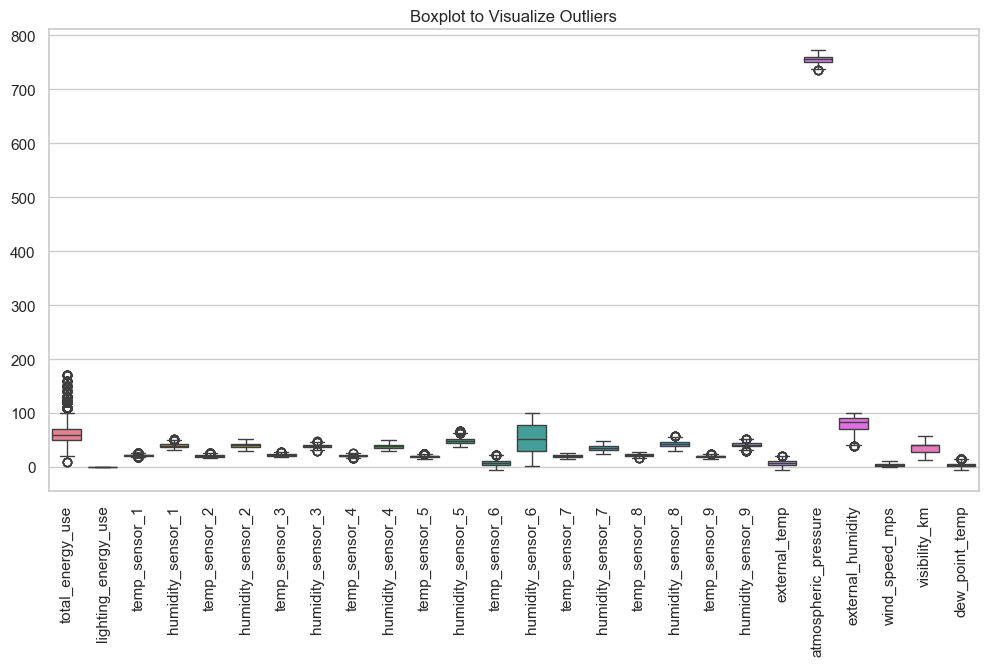

In [9]:
# Optional: Visualize outliers before removing
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot to Visualize Outliers")
plt.show()


In [ ]:
#Feature scaling
#separate features and target
features=df.drop(columns=['total_energy_use','lighting_energy_use'])
target=df['total_energy_use'] #Target variable

#Standardize feature values
scaler=StandardScaler()
scaled_features=pd.DataFrame(scaler.fit_transform(features),index=features.index,columns=features.columns)


#combine scaled features with target
df_model=scaled_features.copy()
df_model['total_energy_use']=target


In [11]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Separate again from df_model
X = df_model.drop(columns=['total_energy_use'])
y = df_model['total_energy_use']

# Select top k best features
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# Get feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))


Selected Features: ['temp_sensor_1', 'temp_sensor_2', 'temp_sensor_6', 'humidity_sensor_6', 'temp_sensor_8', 'humidity_sensor_8', 'humidity_sensor_9', 'external_temp', 'external_humidity', 'hour']


In [45]:
df.describe()

,total_energy_use,lighting_energy_use,temp_sensor_1,humidity_sensor_1,temp_sensor_2,humidity_sensor_2,temp_sensor_3,humidity_sensor_3,temp_sensor_4,humidity_sensor_4,temp_sensor_5,humidity_sensor_5,temp_sensor_6,humidity_sensor_6,temp_sensor_7,humidity_sensor_7,temp_sensor_8,humidity_sensor_8,temp_sensor_9,humidity_sensor_9,external_temp,atmospheric_pressure,external_humidity,wind_speed_mps,visibility_km,dew_point_temp,hour,day_of_week,month
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,11.502002,2.977249,3.101647
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,6.921953,1.985617,1.339200
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.000000,0.000000,1.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,6.000000,1.000000,2.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,12.000000,3.000000,3.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,17.000000,5.000000,4.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,23.000000,6.000000,5.000000


In [49]:
df.isnull().sum()

total_energy_use        0
lighting_energy_use     0
temp_sensor_1           0
humidity_sensor_1       0
temp_sensor_2           0
humidity_sensor_2       0
temp_sensor_3           0
humidity_sensor_3       0
temp_sensor_4           0
humidity_sensor_4       0
temp_sensor_5           0
humidity_sensor_5       0
temp_sensor_6           0
humidity_sensor_6       0
temp_sensor_7           0
humidity_sensor_7       0
temp_sensor_8           0
humidity_sensor_8       0
temp_sensor_9           0
humidity_sensor_9       0
external_temp           0
atmospheric_pressure    0
external_humidity       0
wind_speed_mps          0
visibility_km           0
dew_point_temp          0
hour                    0
day_of_week             0
month                   0
dtype: int64

In [51]:
df.duplicated().sum()
df.nunique()

total_energy_use          92
lighting_energy_use        8
temp_sensor_1            722
humidity_sensor_1       2547
temp_sensor_2           1650
humidity_sensor_2       3376
temp_sensor_3           1426
humidity_sensor_3       2618
temp_sensor_4           1390
humidity_sensor_4       2987
temp_sensor_5           2263
humidity_sensor_5       7571
temp_sensor_6           4446
humidity_sensor_6       9708
temp_sensor_7           1955
humidity_sensor_7       5891
temp_sensor_8           2228
humidity_sensor_8       6649
temp_sensor_9            924
humidity_sensor_9       3388
external_temp           1055
atmospheric_pressure    2189
external_humidity        566
wind_speed_mps           189
visibility_km            412
dew_point_temp          1118
hour                      24
day_of_week                7
month                      5
dtype: int64

##  Step 2: Exploratory Data Analysis (EDA)

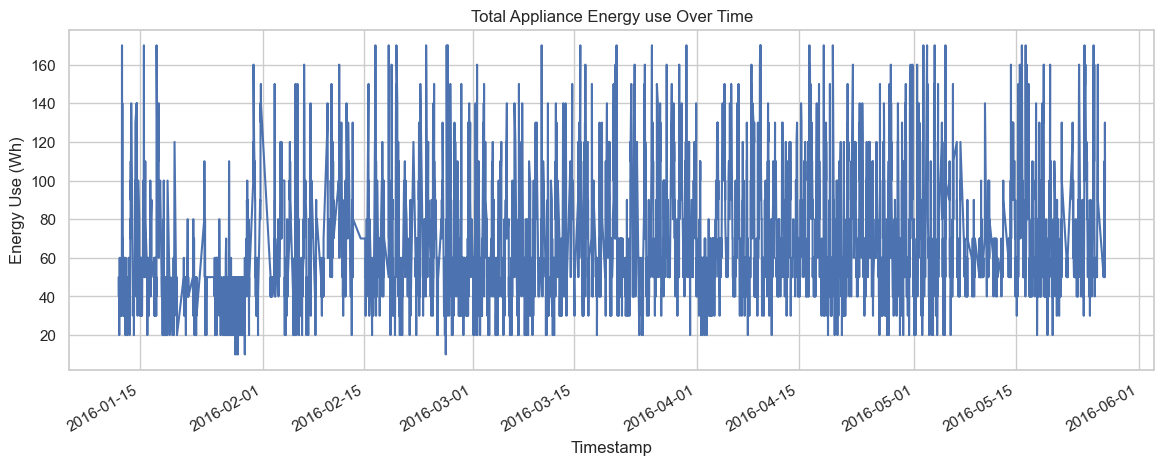

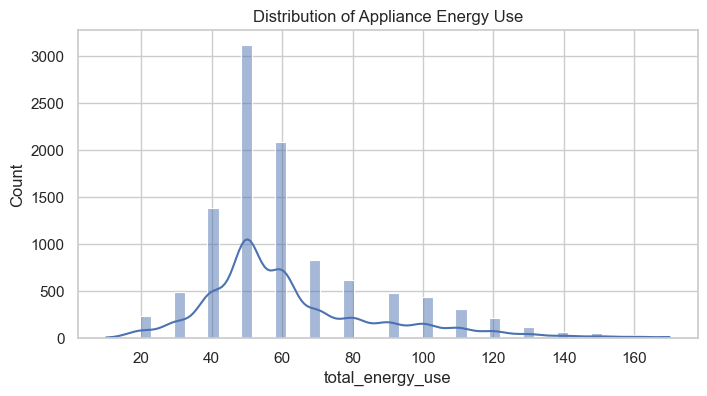

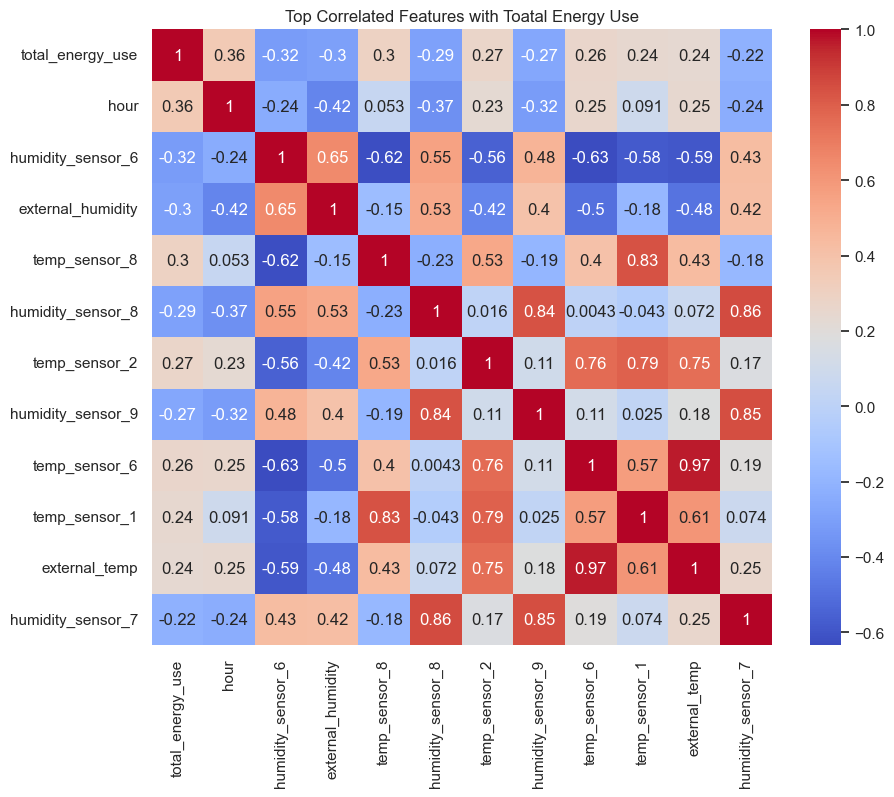

In [10]:
#plot time series of energy use
plt.figure(figsize=(14,5))
df['total_energy_use'].plot(title='Total Appliance Energy use Over Time')
plt.xlabel("Timestamp")
plt.ylabel('Energy Use (Wh)')
plt.show()

#plot distribution of target variable
plt.figure(figsize=(8,4))
sns.histplot(df['total_energy_use'],bins=50,kde=True)
plt.title("Distribution of Appliance Energy Use")
plt.show()

#compute correlations and plot heatmap for top features
corr=df.corr()
top_corr=corr['total_energy_use'].abs().sort_values(ascending=False).head(12)
plt.figure(figsize=(10,8))
sns.heatmap(df[top_corr.index].corr(),annot=True,cmap='coolwarm')
plt.title("Top Correlated Features with Toatal Energy Use")
plt.show()

##  Step 3: Train-Test Split

In [12]:
#Split the features and target into training and testing sets
X=df_model.drop(columns='total_energy_use')
y=df_model['total_energy_use']

#use 80% data for training and 20% for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

##  Step 4: Train Models

###  Linear Regression

In [13]:
#Train a Linear Regression model
lr=LinearRegression()
lr.fit(X_train,y_train)   

#make predictions
y_pred_lr=lr.predict(X_test)
print(y_pred_lr)

[77.40036169 81.50698324 52.05599323 ... 52.89927683 59.16208216
 46.65482443]


###  Decision Tree

In [14]:
#Train the Decision Tree Regressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

#make predictions
y_pred_dt=dt.predict(X_test)
print(y_pred_dt)

[40. 70. 40. ... 50. 90. 50.]


###  Gradient Boosting

In [15]:
#Train the Gradient Boosting Regressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

#make predictions
y_pred_gbr=gbr.predict(X_test)
print(y_pred_gbr)


[61.82516796 76.51184008 59.39158819 ... 55.04273599 67.06325656
 44.15260212]


##  Step 5: Model Evaluation

In [16]:
# Store results in a list
results = []

# Define a function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results.append({
        "Model": model_name,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })

# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_gbr, "Gradient Boosting")

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

            Model       MAE      RMSE  R² Score
Linear Regression 15.087861 21.380523  0.312848
    Decision Tree 12.241297 19.657293  0.419151
Gradient Boosting 12.704813 18.602601  0.479808


##  Step 6: Feature Importance (Gradient Boosting)

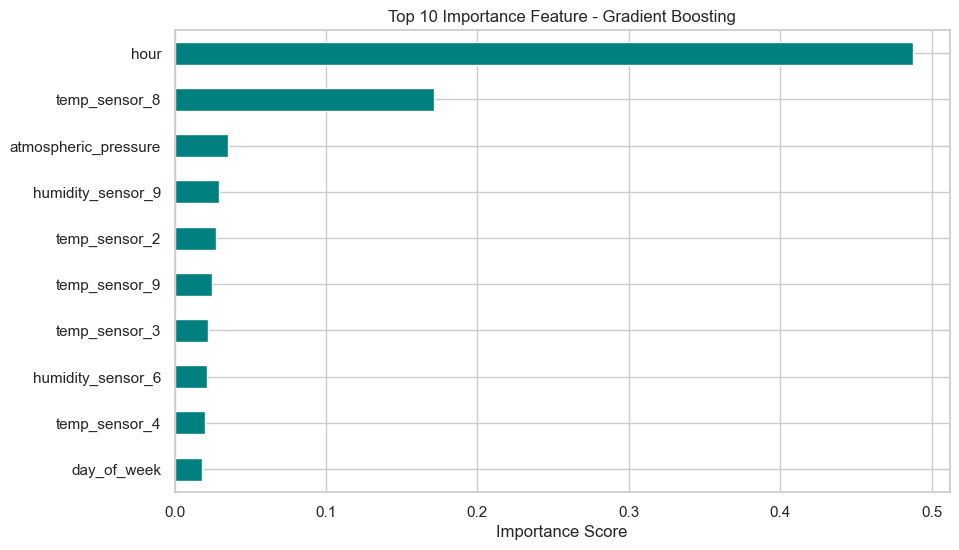

In [17]:
#Analyze and visualize feature importance from Gradient Boosting model 
importances=pd.Series(gbr.feature_importances_,index=X.columns)
top_features=importances.sort_values(ascending=False).head(10)

#plot top 10 important features
plt.figure(figsize=(10,6))
top_features.plot(kind='barh',color='teal')
plt.title("Top 10 Importance Feature - Gradient Boosting")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()